<a href="https://colab.research.google.com/github/muskanalirizvi/Project-Random-Forest-for-Liver-Disease-Prediction-with-Oversampling/blob/main/Random_Forest_for_Liver_Disease_Prediction_with_Oversampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [49]:
data=pd.read_csv("/content/Liver Patient Dataset (LPD)_train.csv",encoding= 'unicode_escape')
data.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


*Description of Columns:**

1.  **Age of the patient:** Indicates the age of the patient.
2.**Gender of the patient:** Specifies the patient's gender (Male or Female).
3.**Total Bilirubin:** Measures the total bilirubin level in the blood, an indicator of liver function.
4.**Direct Bilirubin**: Represents the direct bilirubin level, showing how much is directly processed by the liver.
5.**Alkphos Alkaline Phosphotase:** Level of alkaline phosphatase, an enzyme linked to liver and bone health.
6.**Sgpt Alamine Aminotransferase:** Measures the SGPT enzyme level, which is elevated in liver damage.
7.**Sgot Aspartate Aminotransferase:** SGOT enzyme level, often used to assess liver function.
8.**Total Proteins:** Total protein level in the blood, including albumin and globulin.
9.**ALB Albumin:** Indicates albumin level, a protein made by the liver.
10.**A/G Ratio Albumin and Globulin Ratio:** The ratio of albumin to globulin, useful for assessing liver function.
11.**Result:** The target variable indicating a liver condition diagnosis (1 = liver disease, 0 = no liver disease).




In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [51]:
data.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,30689.000000,30043.000000,30130.000000,29895.000000,30153.000000,30229.000000,30228.000000,30197.000000,30132.000000,30691.000000
mean,44.107205,3.370319,1.528042,289.075364,81.488641,111.469979,6.480237,3.130142,0.943467,1.285882
std,15.981043,6.255522,2.869592,238.537589,182.158850,280.851078,1.081980,0.792281,0.323164,0.451841
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.800000,0.200000,175.000000,23.000000,26.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.900000,1.000000
75%,55.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [52]:
data.isnull().sum()

,0
Age of the patient,2
Gender of the patient,902
Total Bilirubin,648
Direct Bilirubin,561
Alkphos Alkaline Phosphotase,796
Sgpt Alamine Aminotransferase,538
Sgot Aspartate Aminotransferase,462
Total Protiens,463
ALB Albumin,494
A/G Ratio Albumin and Globulin Ratio,559


**Fill missing values**

In [53]:
#Fill missing values with the next valid entry and check for any remaining nulls
data=data.fillna(method='bfill')
data.isnull().sum()

<ipython-input-53-63ac98335c5e>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data=data.fillna(method='bfill')


,0
Age of the patient,0
Gender of the patient,0
Total Bilirubin,0
Direct Bilirubin,0
Alkphos Alkaline Phosphotase,0
Sgpt Alamine Aminotransferase,0
Sgot Aspartate Aminotransferase,0
Total Protiens,0
ALB Albumin,0
A/G Ratio Albumin and Globulin Ratio,0


**Encoding Categorical column "Age"**

In [54]:
# Encodes the 'Gender of the patient' column into numerical values and displays the updated dataset summary
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
data['Gender of the patient']=enc.fit_transform(data['Gender of the patient'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30691 non-null  float64
 1   Gender of the patient                 30691 non-null  int64  
 2   Total Bilirubin                       30691 non-null  float64
 3   Direct Bilirubin                      30691 non-null  float64
 4    Alkphos Alkaline Phosphotase         30691 non-null  float64
 5    Sgpt Alamine Aminotransferase        30691 non-null  float64
 6   Sgot Aspartate Aminotransferase       30691 non-null  float64
 7   Total Protiens                        30691 non-null  float64
 8    ALB Albumin                          30691 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30691 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

**Removeing duplicate**

In [55]:
# Removes duplicate rows and displays a summary of the dataset's structure
data=data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19090 entries, 0 to 30689
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    19090 non-null  float64
 1   Gender of the patient                 19090 non-null  int64  
 2   Total Bilirubin                       19090 non-null  float64
 3   Direct Bilirubin                      19090 non-null  float64
 4    Alkphos Alkaline Phosphotase         19090 non-null  float64
 5    Sgpt Alamine Aminotransferase        19090 non-null  float64
 6   Sgot Aspartate Aminotransferase       19090 non-null  float64
 7   Total Protiens                        19090 non-null  float64
 8    ALB Albumin                          19090 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  19090 non-null  float64
 10  Result                                19090 non-null  int64  
dtypes: float64(9), int64

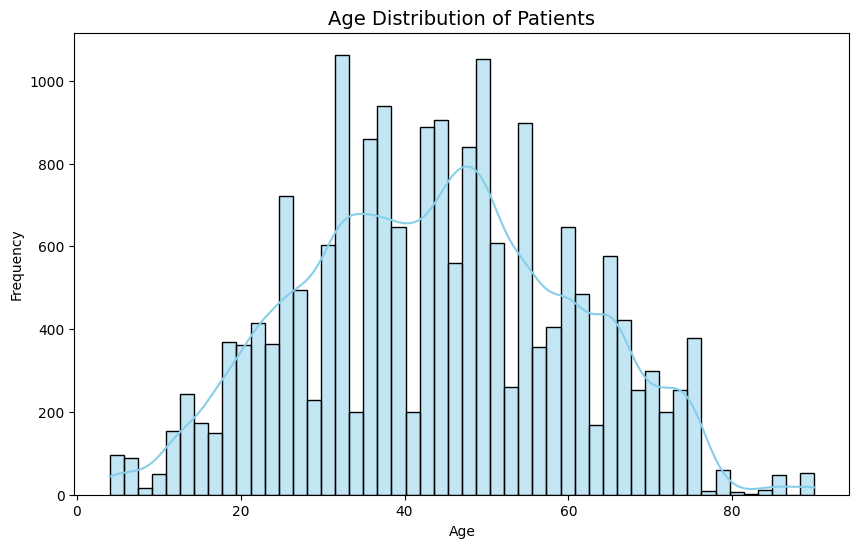

In [56]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age of the patient'], kde=True, color='skyblue')
plt.title('Age Distribution of Patients', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<ipython-input-57-471f43500a54>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender of the patient',data=data, palette='pastel')


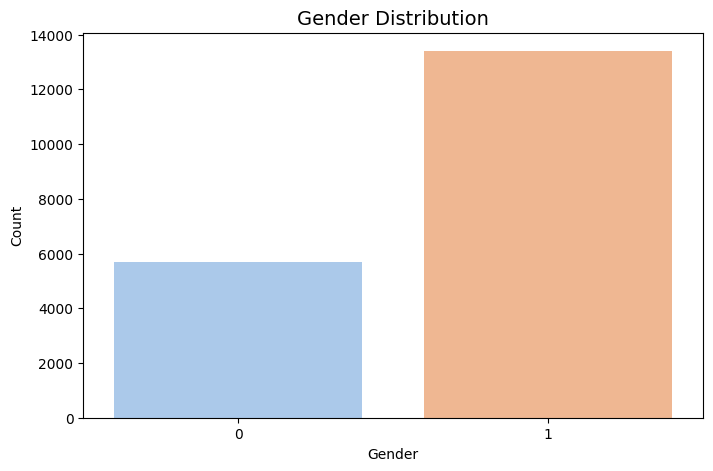

In [57]:
# Gender Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender of the patient',data=data, palette='pastel')
plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

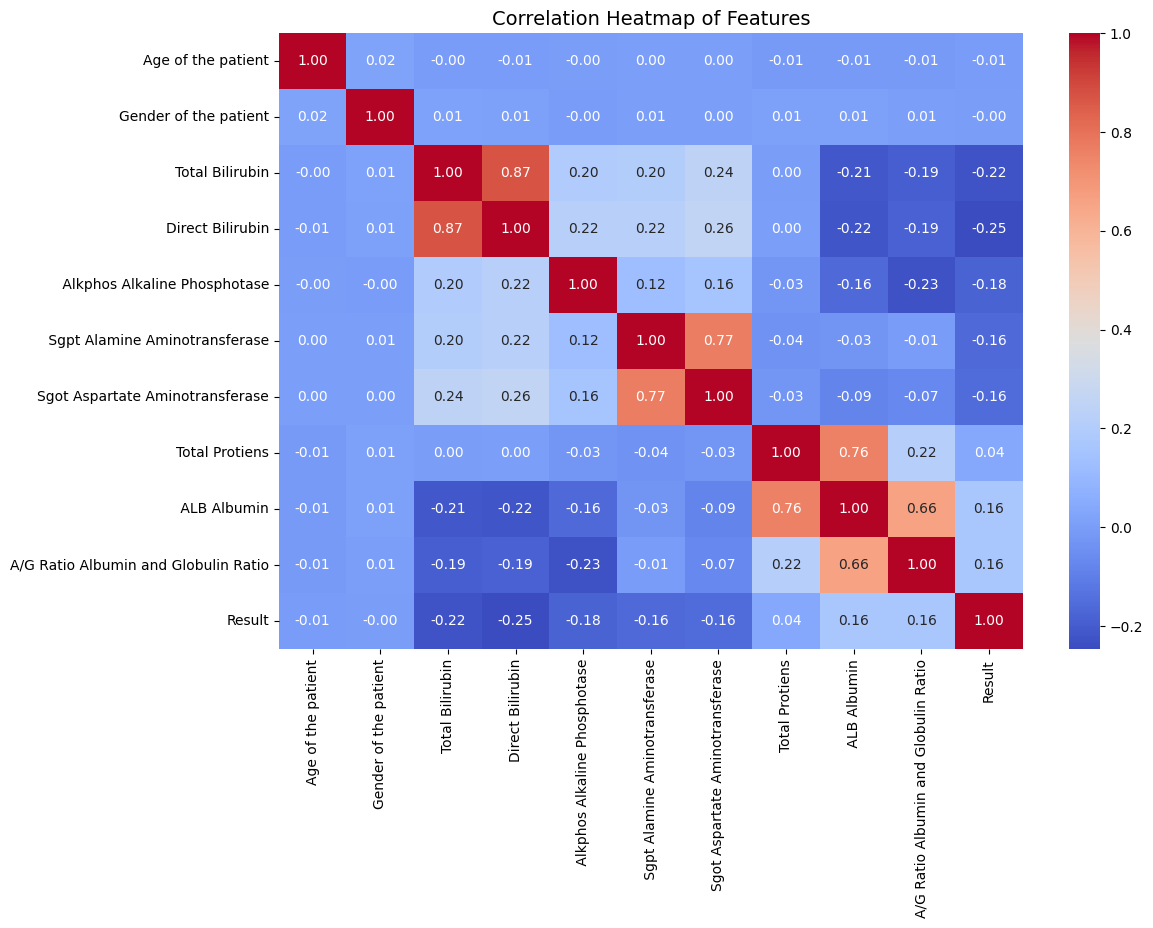

In [58]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features', fontsize=14)
plt.show()

In [59]:
import plotly.express as px

# Interactive Scatter Plot for Age vs. Total Bilirubin
fig = px.scatter(data, x='Age of the patient', y='Total Bilirubin', color='Gender of the patient',
                 title='Age vs Total Bilirubin', labels={'Total Bilirubin': 'Total Bilirubin (mg/dL)'})
fig.show()


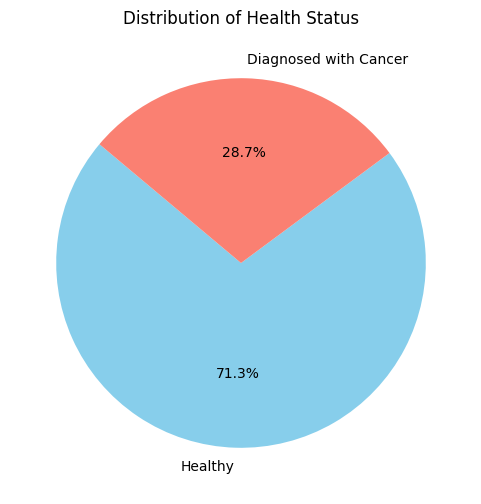

In [60]:
result_counts = data['Result'].value_counts()
labels = ['Healthy', 'Diagnosed with Cancer']
values = [result_counts[1], result_counts[2]]

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])

# Add a title
plt.title('Distribution of Health Status')

# Show the chart
plt.show()

In [61]:
data['Result'].value_counts()

,count
Result,
1,13603
2,5487


# Handling Class Imbalance (Oversampling)

In [ ]:
# Filters the dataset into two classes based on the 'Result' column: cls_0 for liver disease (Result=1) and cls_1 for no liver disease (Result=2)
cls_0=data[data['Result']==1]
cls_1=data[data['Result']==2]

In [ ]:
len(cls_0)

13603

In [ ]:
len(cls_1)

5487

In [ ]:
# Balances the dataset by oversampling 'cls_1' and concatenates both classes
cls_1=cls_1.sample(13770,replace=True)
data=pd.concat([cls_0,cls_1],axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27373 entries, 0 to 15924
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    27373 non-null  float64
 1   Gender of the patient                 27373 non-null  int64  
 2   Total Bilirubin                       27373 non-null  float64
 3   Direct Bilirubin                      27373 non-null  float64
 4    Alkphos Alkaline Phosphotase         27373 non-null  float64
 5    Sgpt Alamine Aminotransferase        27373 non-null  float64
 6   Sgot Aspartate Aminotransferase       27373 non-null  float64
 7   Total Protiens                        27373 non-null  float64
 8    ALB Albumin                          27373 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  27373 non-null  float64
 10  Result                                27373 non-null  int64  
dtypes: float64(9), int64

# Feature Scaling (Normalization)

In [67]:
# Normalizes all columns in the dataset to a range between 0 and 1
for x in data.columns:
    data[x]=(data[x]-data[x].min())/(data[x].max()-data[x].min())
data.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,0.709302,0.0,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,0.0
1,0.674419,1.0,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,0.0
2,0.674419,1.0,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,0.0
3,0.627907,1.0,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,0.0
4,0.790698,1.0,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,0.0


In [68]:
data['Result'].value_counts()

,count
Result,
0.0,13603
1.0,5487


In [75]:
from imblearn.over_sampling import SMOTE

sm=SMOTE()
x_resample,Y_resample=sm.fit_resample(x,y.values.ravel())
Y_resample=pd.DataFrame(Y_resample)
x_resample=pd.DataFrame(x_resample)
data = pd.concat([x_resample, Y_resample], axis=1)
data = data.set_axis([*data.columns[:-1], 'Result'], axis=1)
data.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,0.709302,0.0,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,0.0
1,0.674419,1.0,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,0.0
2,0.674419,1.0,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,0.0
3,0.627907,1.0,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,0.0
4,0.790698,1.0,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,0.0


In [71]:
data.head(20)

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,0
0,0.709302,0.0,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,0.0
1,0.674419,1.0,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,0.0
2,0.674419,1.0,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,0.0
3,0.627907,1.0,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,0.0
4,0.790698,1.0,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,0.0
5,0.488372,1.0,0.018767,0.030612,0.070835,0.004523,0.000813,0.710145,0.760870,0.400,0.0
6,0.255814,0.0,0.006702,0.005102,0.044455,0.002010,0.000407,0.623188,0.565217,0.280,0.0
7,0.290698,0.0,0.006702,0.010204,0.067904,0.002010,0.000203,0.579710,0.586957,0.320,0.0
8,0.151163,1.0,0.006702,0.010204,0.067904,0.006030,0.001830,0.681159,0.695652,0.360,1.0
9,0.593023,1.0,0.004021,0.005102,0.110894,0.021608,0.009758,0.594203,0.543478,0.280,0.0


In [76]:
y=data['Result']
x=data.drop(['Result'],axis=1)

# Train-Test Split

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,stratify=y)

# Model Training (XGBoost)

In [79]:
from xgboost import XGBClassifier
svc_model=XGBClassifier()
svc_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Model Evaluation on Training Set

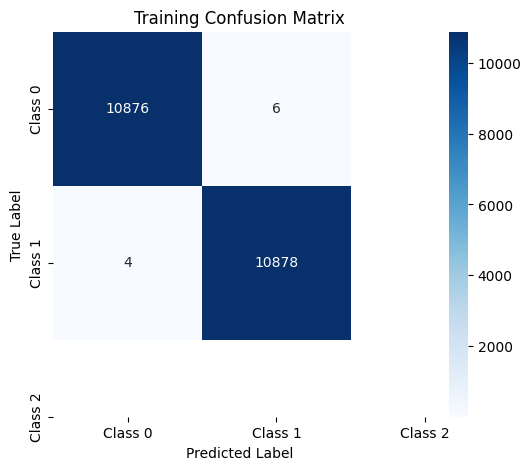

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Make predictions on the training set
predictions_train = svc_model.predict(X_train)
train_percentage = svc_model.score(X_train, y_train)
res_train = confusion_matrix(y_train, predictions_train)

# Make predictions on the testing set
predictions_test = svc_model.predict(X_test)
test_percentage = svc_model.score(X_test, y_test)
res_test = confusion_matrix(y_test, predictions_test)

# Plot confusion matrix for the training set
plt.figure(figsize=(6, 5))
sns.heatmap(res_train, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
plt.title("Training Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



# Model Evaluation on Test Set

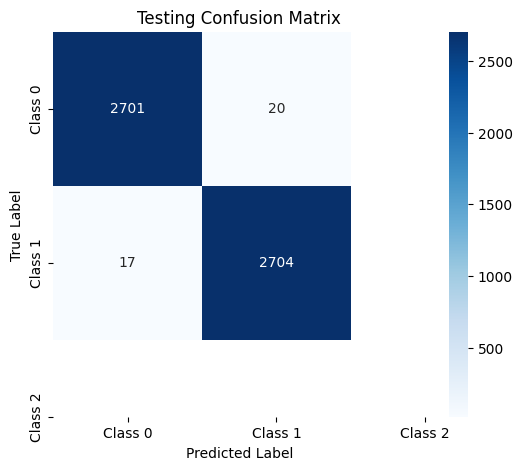

In [81]:
# Plot confusion matrix for the testing set
plt.figure(figsize=(6, 5))
sns.heatmap(res_test, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1", "Class 2"], yticklabels=["Class 0", "Class 1", "Class 2"])
plt.title("Testing Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



In [82]:
# Print the accuracy on both sets
from sklearn.metrics import accuracy_score
print(f"Train Accuracy = {train_percentage * 100}%")
print(f"Test Accuracy = {test_percentage * 100}%")
print(f"Train set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
ac = accuracy_score(y_test, predictions_test)
print("Accuracy: ", ac)


Train Accuracy = 99.95405256386694%
Test Accuracy = 99.32010290334435%
Train set size: 21764
Test set size: 5442
Accuracy:  0.9932010290334435


In [83]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform 5-fold cross-validation
cv_scores = cross_val_score(svc_model, x, y, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print(f"Mean Accuracy: {np.mean(cv_scores) * 100:.2f}%")
print(f"Standard Deviation: {np.std(cv_scores) * 100:.2f}%")


Cross-Validation Scores: [0.99191474 0.99558905 0.99393494 0.99577284 0.99356736]
Mean Accuracy: 99.42%
Standard Deviation: 0.14%


In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate the model on training and testing datasets
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)

print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, x, y, cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print(f"Mean Accuracy: {np.mean(cv_scores) * 100:.2f}%")
print(f"Standard Deviation: {np.std(cv_scores) * 100:.2f}%")


Train Accuracy: 99.99%
Test Accuracy: 99.38%
Cross-Validation Scores: [0.99154723 0.99724315 0.99522147 0.99595663 0.99669178]
Mean Accuracy: 99.53%
Standard Deviation: 0.20%
